In [1]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
image = cv2.imread('uncropped/green3.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

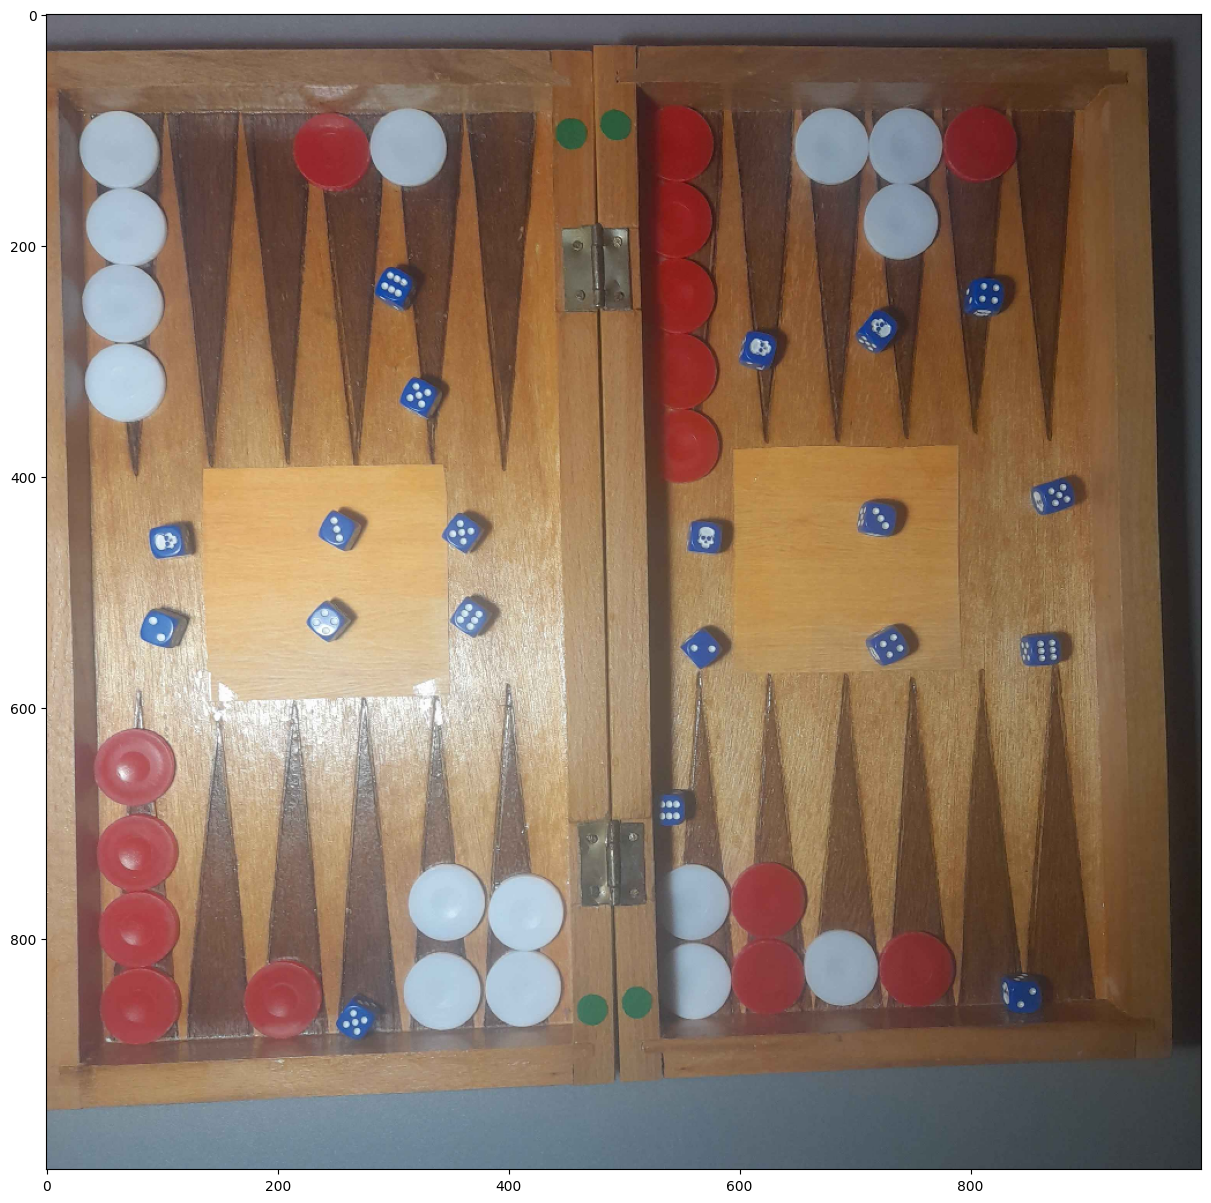

In [3]:
img = cv2.resize(image, (1000,1000))
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

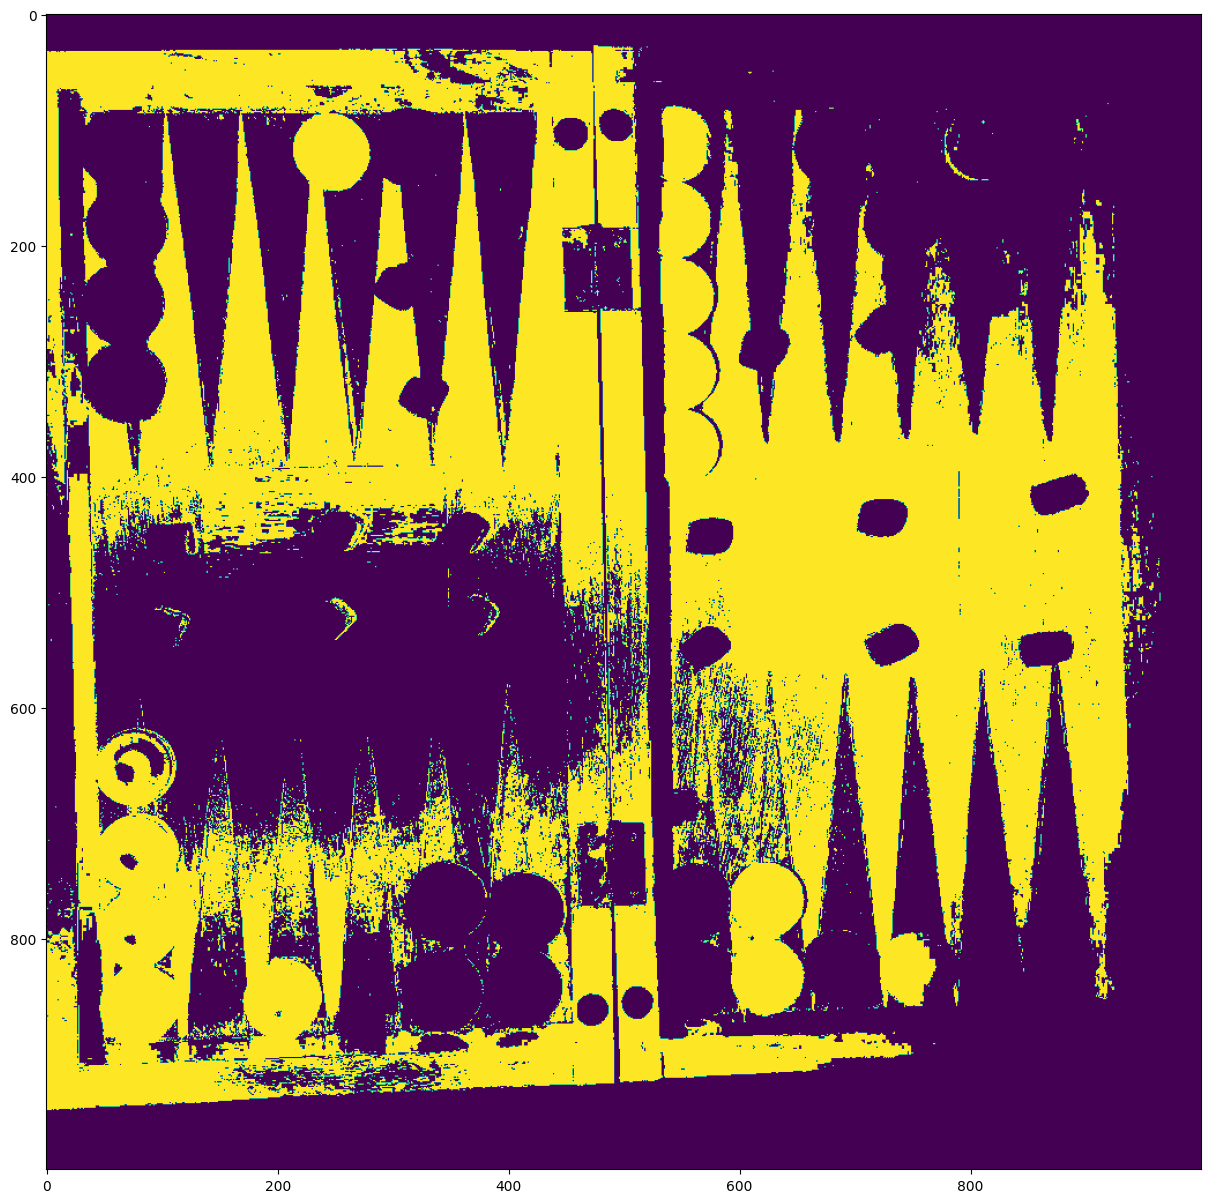

In [12]:
mask_R = img[:, :, 0] > 120
mask_G = img[:, :, 1] < 60
mask_B = img[:, :, 2] < 120

mask = (mask_R == 1) & (mask_R == 1) & (mask_B == 1)

plt.figure(figsize=(15,15))
plt.imshow(mask)
plt.show()

In [52]:
import numpy as np
img = cv2.resize(image, (1000,1000))

# Assuming `img` is your NumPy array with shape (height, width, 3)
R = img[:, :, 0].astype(float)  # Extract red channel
G = img[:, :, 1].astype(float)  # Extract green channel
B = img[:, :, 2].astype(float)  # Extract blue channel

# Compute the maximum of B and G element-wise
max_BG = np.maximum(B, G)

# To avoid division by zero, replace zeros in max_BG with a very small value
max_BG[max_BG == 0] = 1e-10

# Compute the ratio R / max(B, G)
ratio = R / max_BG

# Create the mask where the ratio is greater than 2
mask = ratio > 2

# Convert the boolean mask to an integer mask (1 for True, 0 for False)
mask = mask.astype(np.uint8)

mask = cv2.erode(mask, np.ones((3,3)), iterations= 1)

# `mask` is a 2D array of shape (height, width) with values 0 or 1
plt.figure(figsize=(15,15))
plt.imshow(mask)
plt.show()

Detection time: 0.010820388793945312


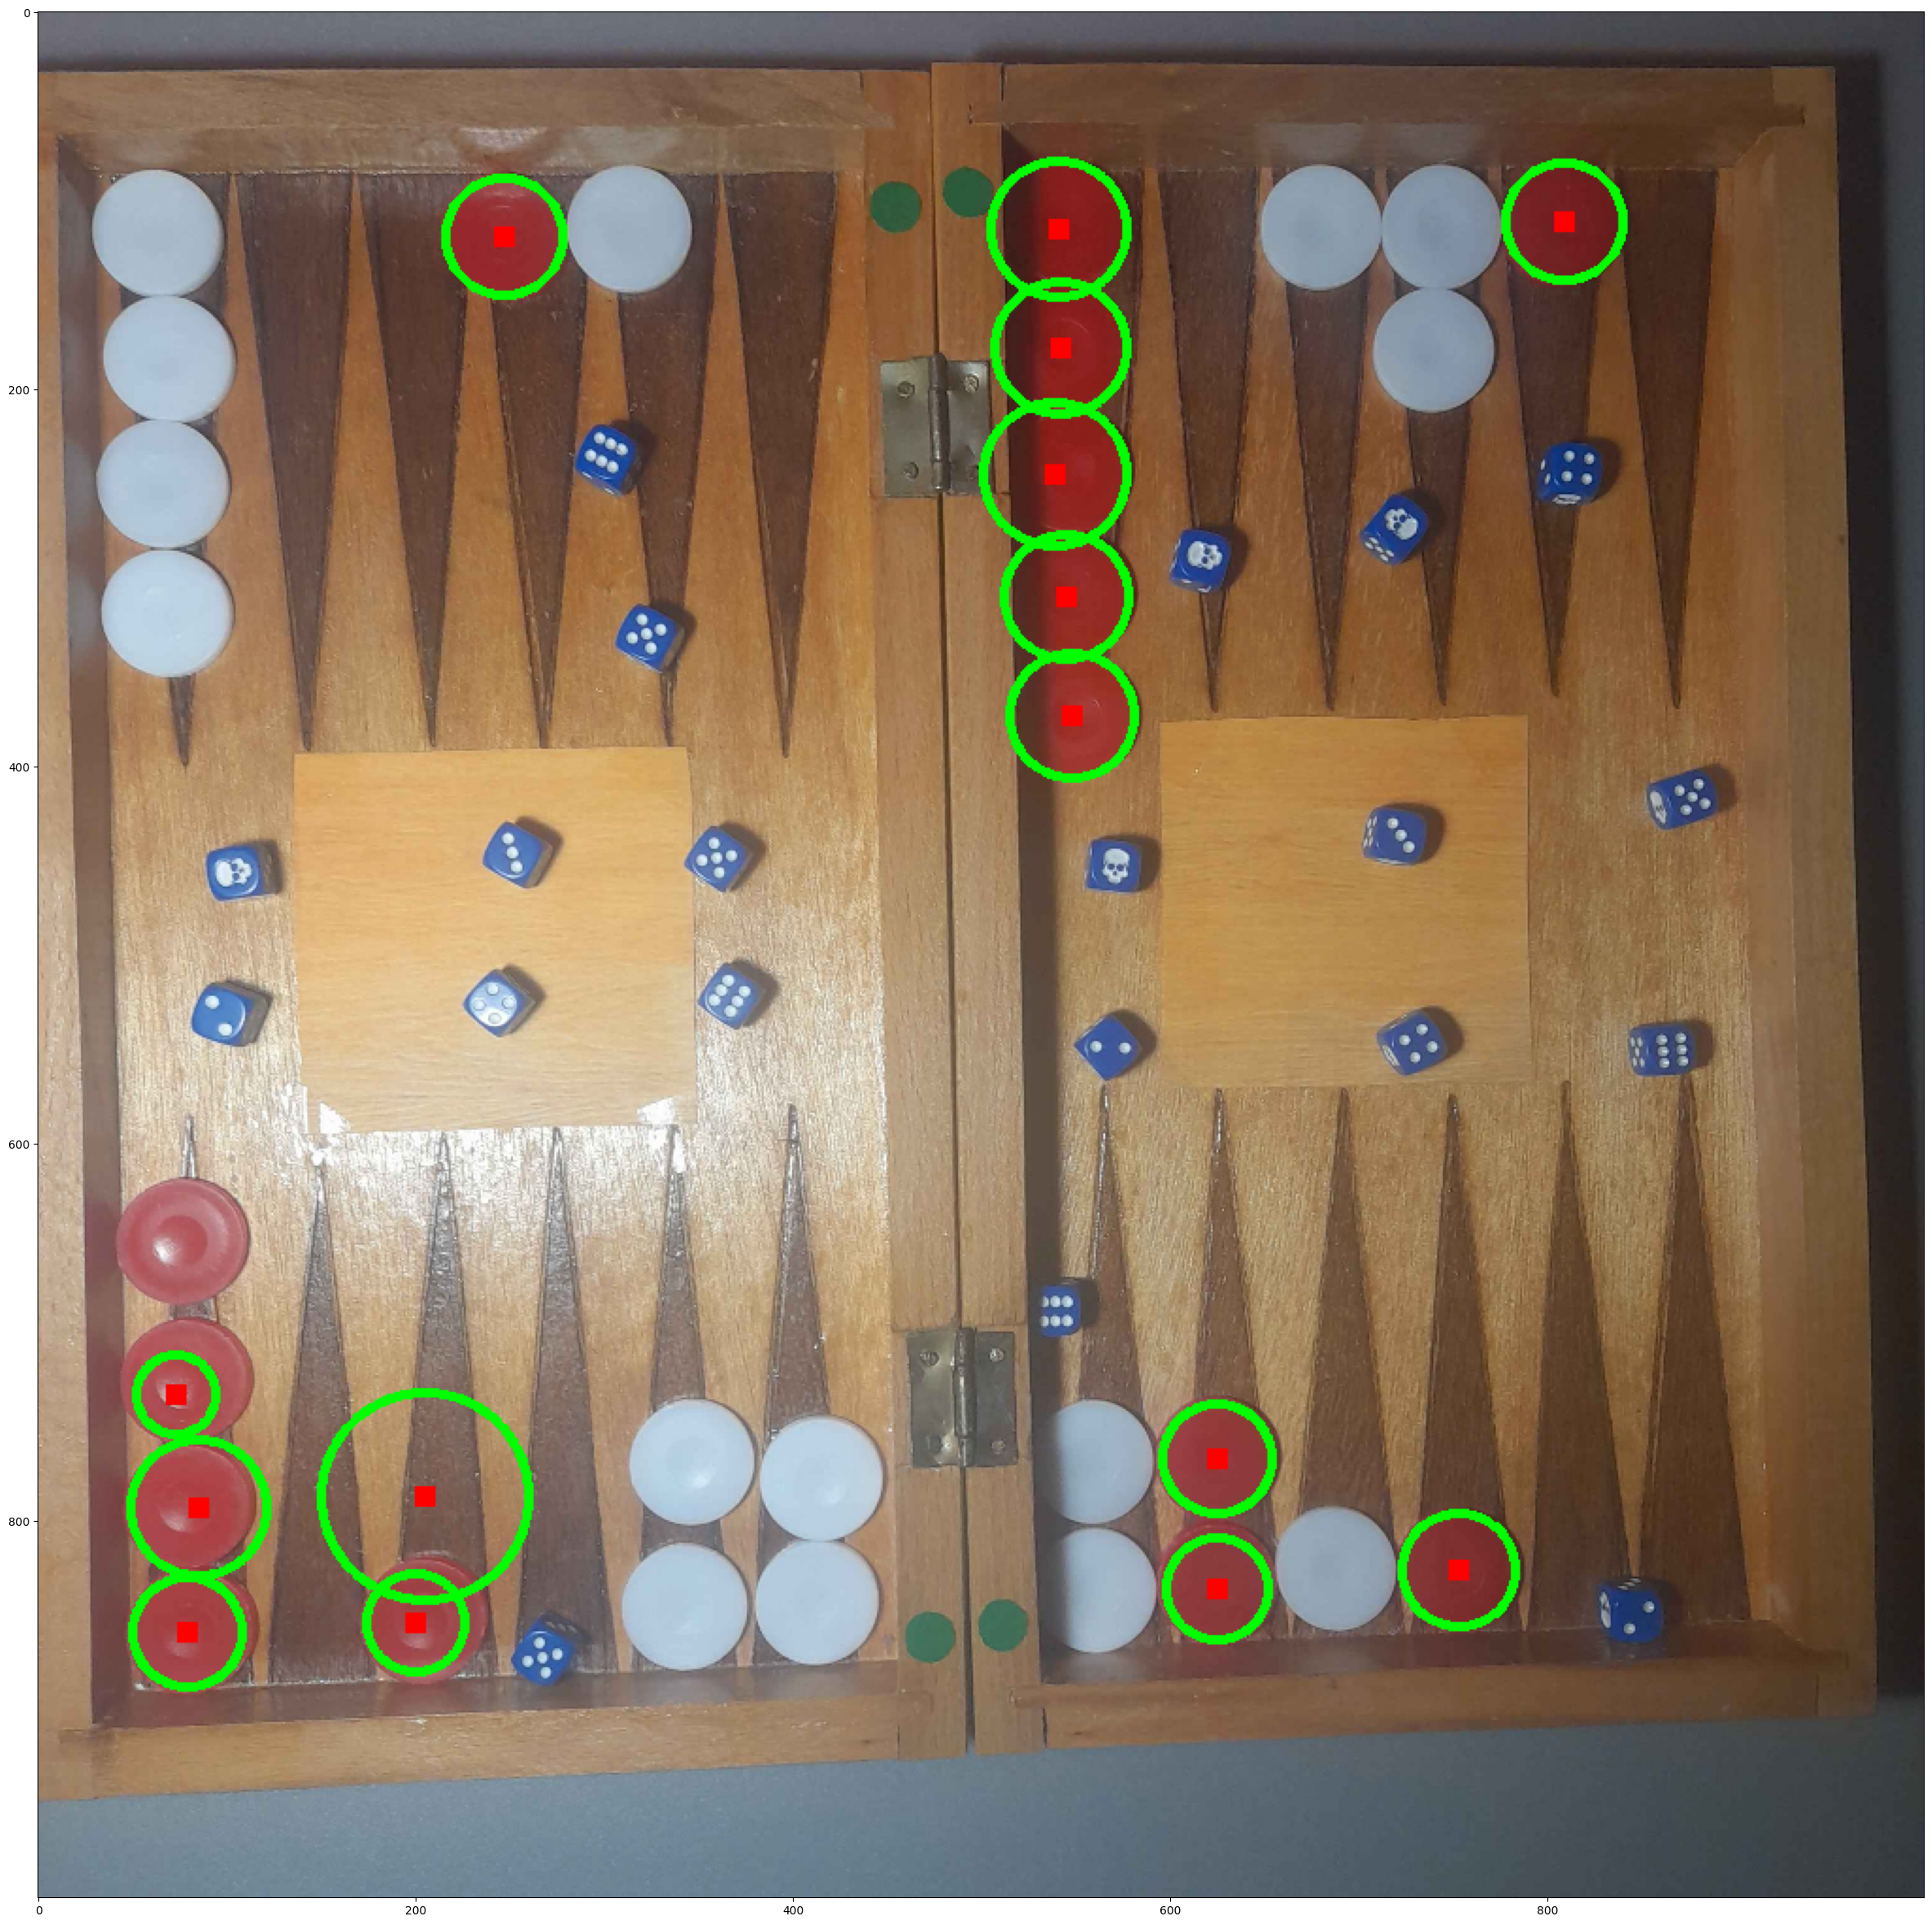

In [56]:

# Load the image
img = cv2.resize(image, (1000,1000))
gray =mask# cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

start = time.time()

# Apply Gaussian Blur to reduce noise
# blurred = cv2.GaussianBlur(gray, (9, 9), 2)
blurred = cv2.GaussianBlur(gray, (5,5),0)
blurred = cv2.blur(blurred, (5,5))

# Detect circles using HoughCircles
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=60,
                           param1=3, param2=10, minRadius=20, maxRadius=60)

bar_indicators = []

# If circles are detected, draw them on the image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 4)  # Circle
        cv2.rectangle(img, (x - 5, y - 5), (x + 5, y + 5), (255, 0, 0), -1)  # Center


end = time.time()
print("Detection time:", end-start)

# Display the output
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.show()